<a href="https://colab.research.google.com/github/yamihe19/Project-CaliforniaHousingDataset/blob/main/Code_Project_CaliforniaHousingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project California Housing Dataset

a. Purpose:

Using the California Housing Dataset, build a Linear Regression model with Stochastic Gradient Descent with specific penalty parameters and compare its accuracy with a Linear Regression model.

b. Objectives:

Read the data.
Exploratory Data Analysis.
Feature selection.
Using K-cross validation with K as 5, building 3 linear regression models and comparing their performance:
First model: Linear Regression model with Stochastic Gradient Descent with a penalty of 'Elastic Net'.
Second model: Linear Regression model with Stochastic Gradient Descent with a penalty of 'Ridge Regression'.
Third model: Ordinaty Linear Regression model.

c. Data:

The data we will use is the California Housing Dataset from sklearn datasets, StatLib repository. We can see as follow the description of the variables:

## Libraries needed

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

## 1. Consider the California Housing Dataset from sklearn datasets.

Assigning the data to the object df

In [ ]:
df= fetch_california_housing(as_frame=True)

First, we are going to see the description of the entire dataset.

In [ ]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

As we can observe the description tell us that there are not  missing values and there are 8 attributes or predictors and one target. Now, we are goint to see the head of the data.

In [ ]:
df.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We can see that the targer variables is `MedHouseVal` and the other are the Features

In [ ]:
df.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


There are 20640 entries and

In [ ]:
df.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

There is no missing values in the data set as we said before. Now we can see some graphs of the data set.

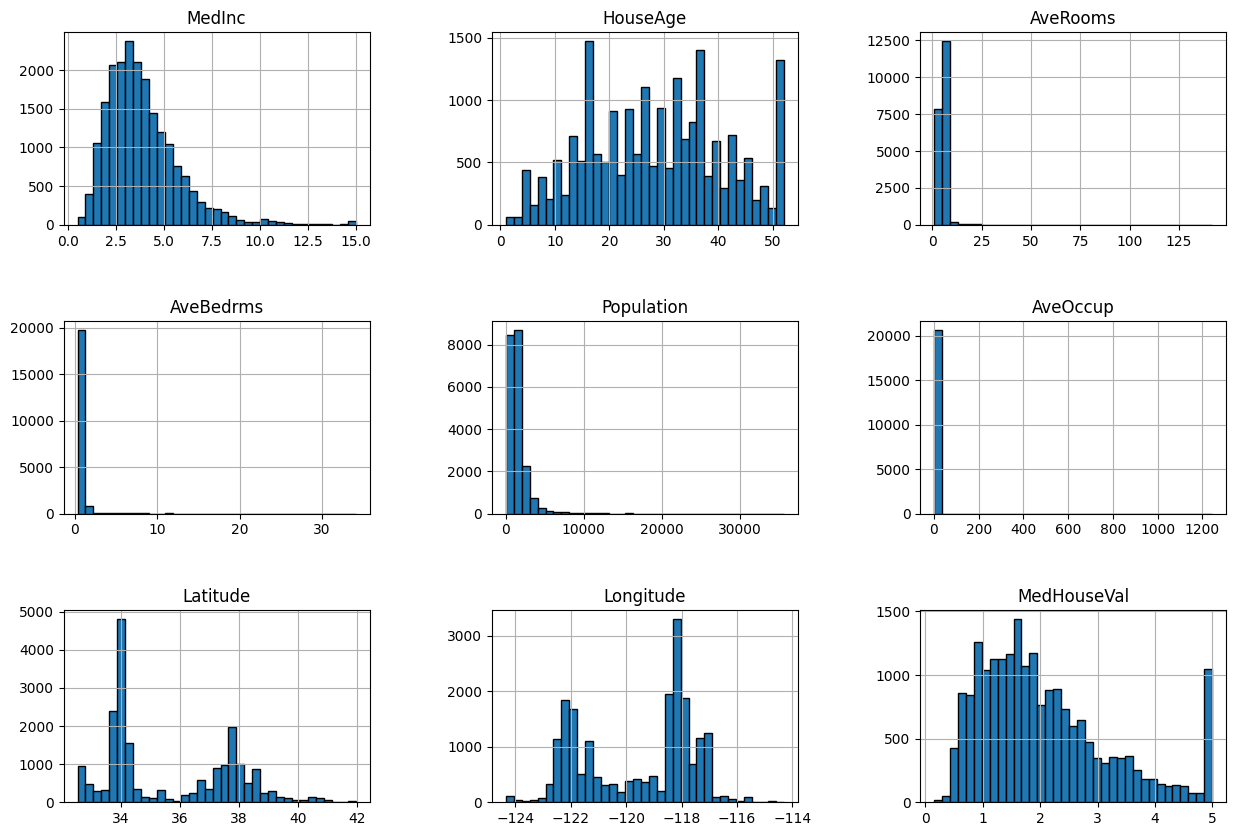

In [ ]:
df.frame.hist(figsize=(15, 10), bins=35, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

There are a lot of variables that are skewed like `MedInc`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup` and `MedHouseVal`, as we can see in our histogram. We are going to try to tranform to get a normal distribution of our response that is `MedHouseVal`.



In [ ]:
df.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


As mentioned earlier, we have identified skewed variables in our dataset. Upon further examination, we can also observe significant deviations between the mean and median values of these variables. Specifically, the variable 'MedInc' exhibits a notable difference between its maximum value and the third quartile. These extreme values suggest the presence of outliers, which have the potential to impact the performance of our model.However, the presence of outliers in 'MedInc' may be expected due to its nature as a representation of median income.

Additionally, we observe a similar pattern in our response variable, where its maximum value is considerably distant from the third quartile. This further indicates the existence of outliers within the response variable.

In [ ]:
df.frame.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

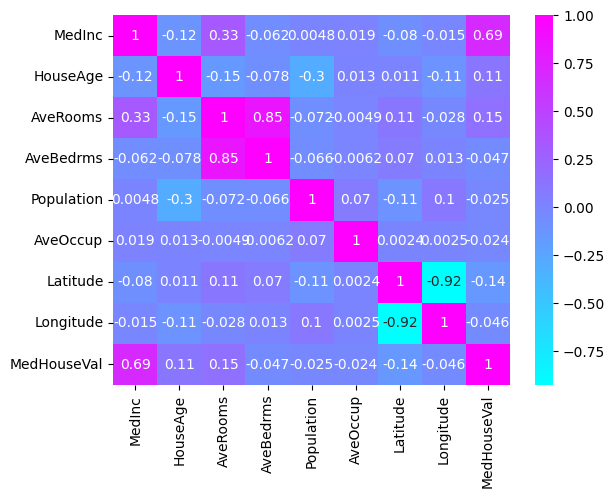

In [ ]:
sns.heatmap(df.frame.corr(),cmap='cool', annot=True)

The correlation matrix provides insights into the relationships between different variables in the dataset. Here is a short conclusion based on the correlation coefficients:

'MedInc' (median income) has a strong positive correlation (0.69) with 'MedHouseVal' (median house value), suggesting that higher median incomes are associated with higher median house values.
'AveRooms' (average number of rooms) shows a moderate positive correlation (0.326) with 'MedInc', indicating that areas with more rooms tend to have higher median incomes.
'HouseAge' (median age of houses) has a weak negative correlation (-0.119) with 'MedInc', suggesting that older houses tend to have slightly lower median incomes.
'Latitude' and 'Longitude' have a strong negative correlation (-0.925), indicating that locations closer to the coast have lower latitudes and higher longitudes. That suggest the presence of multicollinearity.
Other variables, such as 'AveBedrms', 'Population', and 'AveOccup', show relatively weak correlations with 'MedInc' and 'MedHouseVal'.
Overall, the correlation matrix highlights the relationships between the variables and provides initial insights into their associations. However, it's important to note that correlation does not imply causation, and further analysis is needed to fully understand the relationships between these variables.

In [ ]:
columns_num =df.frame.columns

In [ ]:
from scipy import stats
def get_pearsonr_and_pvalue():
    column_list = []
    for column in columns_num:
        coef, p_val = stats.pearsonr(df.frame[column], df.frame['MedHouseVal'])
        if (p_val <0.05 and abs(coef)> 0.42):
            column_list.append(column)
            print(column)
            print("Correlatrion coeficient value is ",coef)
            print("P value is",p_val)
    return column_list
get_pearsonr_and_pvalue()

MedInc
Correlatrion coeficient value is  0.6880752079585478
P value is 0.0
MedHouseVal
Correlatrion coeficient value is  0.9999999999999994
P value is 0.0


['MedInc', 'MedHouseVal']

The correlation analysis reveals that the variable with the strongest correlation to our response variable, `MedHouseVal`, is `MedInc` (median income). This finding aligns with our intuition, as it makes logical sense that the affordability and value of a house would depend on the income level of individuals or households. Therefore, `MedInc` serves as a crucial predictor in understanding the variation in house values. It suggests that higher median incomes tend to be associated with higher median house values. While other variables in the correlation matrix show weaker correlations, it is evident that `MedInc` stands out as the primary determinant of housing value in this dataset.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

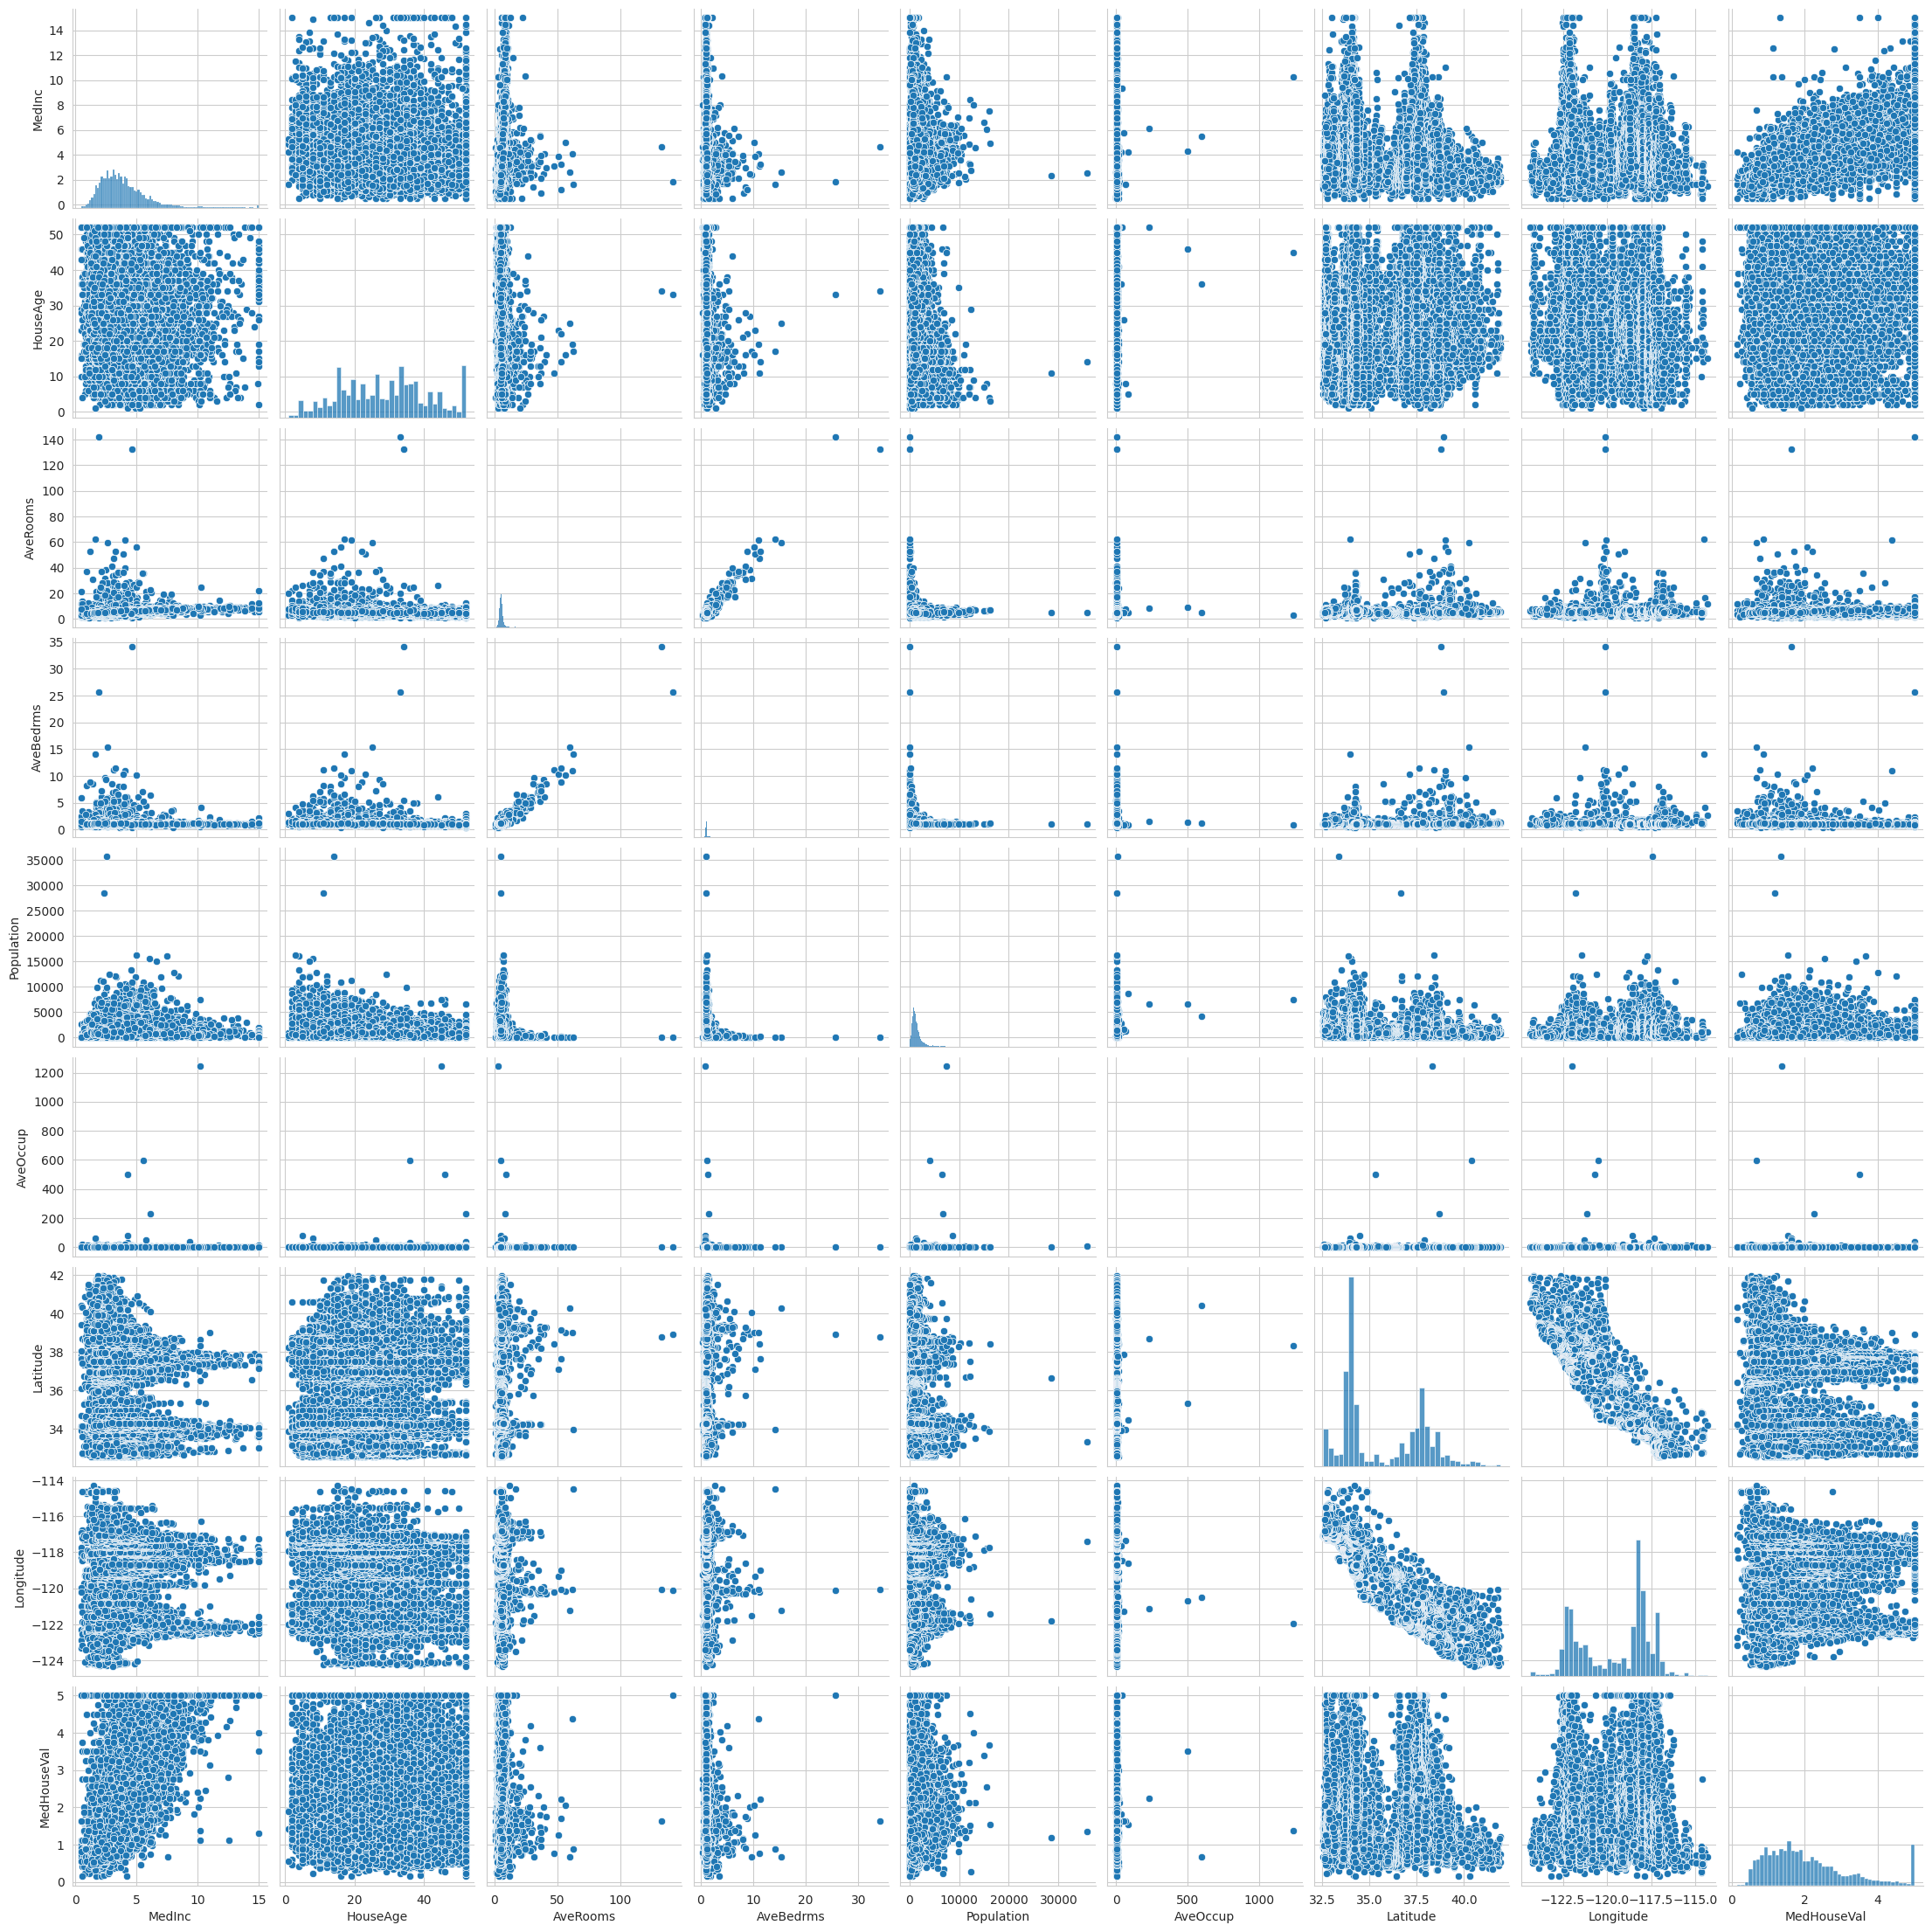

In [ ]:
sns.pairplot(data=df.frame, palette="viridis")

Through our analysis, we can confidently confirm the strong correlation between MedInc (median income) and MedHouseVal (median house value). This finding aligns with our expectation that higher incomes are associated with higher house values.

Furthermore, we have also identified a notable correlation between Longitude and Latitude. The strong negative correlation between these variables indicates that locations closer to the coast tend to have lower latitudes and higher longitudes. This information provides valuable insights into the geographical distribution of the dataset.

Additionally, we observe a clear correlation between AveRooms (average number of rooms) and AveBedrms (average number of bedrooms). This positive correlation suggests that as the number of rooms in a house increases, the number of bedrooms also tends to increase.

Overall, these correlations shed light on the relationships between different variables in the dataset, emphasizing the significant role of income in determining house values and providing valuable insights into geographical patterns and housing characteristics.

<ipython-input-40-5dfdd0fa6828>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.frame['MedHouseVal'])


<Axes: xlabel='MedHouseVal', ylabel='Density'>

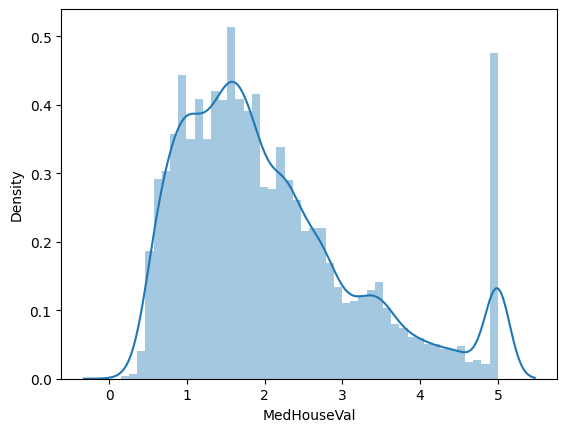

In [ ]:
sns.distplot(df.frame['MedHouseVal'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7f0c815360>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f0c8158a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7f0c8150c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f0c815de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f0c816080>],
 'means': []}

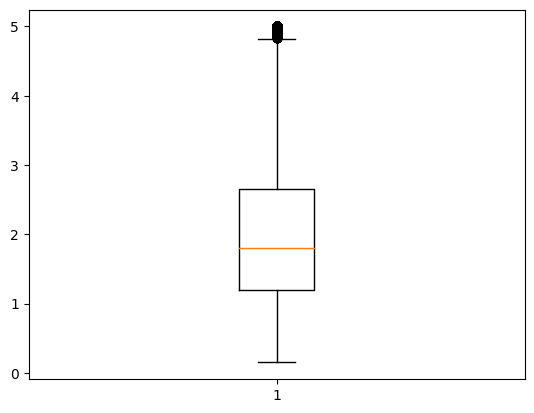

In [ ]:
plt.boxplot(df.frame['MedHouseVal'])

As previously mentioned, our response variable exhibits skewness, indicating a deviation from a normal distribution. While it is recommended to apply a suitable transformation to address this issue, for the purposes of our current analysis, we will proceed without implementing any transformation at this stage.


## 2. Use linear regression with stochastic gradient descent (SGD Regressor in sklearn), with penalty of 'Elastic Net' and 'Ridge Regression' as 2 separate cases, K-cross validation with K as 5, find out and compare the output accuracy of applying Linear regression on the California Housing Dataset. Make sure to use Standard scaler on the dataset.

In [ ]:
#Dividing the data in X and y
X = df.data
y = df.target

#Perform Scaling

sc = StandardScaler()
X_sc = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(16512, 8) (16512,)
(4128, 8) (4128,)


In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
#VIF (ok:<5, between 5-10 check, remove:>10)

X_constant= sm.add_constant(X)
VIF =[variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

VIF_df=pd.DataFrame({'VIF':VIF[1:]}, index= X.columns).T
VIF_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
VIF,2.501295,1.241254,8.342786,6.994995,1.138125,1.008324,9.297624,8.962263


Variables with a VIF value less than 5 (MedInc, HouseAge, Population, and AveOccup) are considered to have acceptable levels of multicollinearity.

Variables with a VIF value between 5 and 10 (AveRooms and AveBedrms) and (Latitude and Longitude) should be checked further for potential multicollinearity issues.

Further analysis and examination of the variables with higher VIF values can be conducted to assess the impact of multicollinearity on the model's performance and consider potential remedies such as removing one of the correlated variables or applying dimensionality reduction techniques.

For now we are going to continue in this way.

In [ ]:
#VIF_df<10

for i in VIF_df.columns:
    if float(VIF_df[i]) <=10:
        print(i)

MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude


All the variables has VIF less than 10 so we keep them.

In [ ]:
# define model
model = SGDRegressor()
#RepeatedKFold means repeating KFold with different random state each time

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)


In [ ]:
#I just want to practice using this Gridsearch for find out the best hyper parameters
#Set paremeters that we want to find
param = {

    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'fit_intercept':[True, False],
    'eta0':[0.1,0.01, 0.001,0.0001],
    'penalty':['l2']
}

#define search# To find out the best parameteres
search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3209706958213.017
Best Hyperparameters: {'alpha': 0.0001, 'eta0': 0.0001, 'fit_intercept': True, 'penalty': 'l2'}


In [ ]:
Regressors = [
    LinearRegression(),
    SGDRegressor(alpha= 0.01, eta0= 0.0001, fit_intercept= True, penalty='elasticnet'),
    SGDRegressor(alpha= 0.0001, eta0= 0.0001, fit_intercept= True, penalty='l2')
]
from time import time
for model in Regressors[:3]:
    # SDG regressor for the two models
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    predict_time = time()-start

    #Cross Validation for every model
    scores = cross_val_score(model, X_train, y_train, cv = 5)
    predictions = cross_val_predict(model, X_test, y_test, cv = 5)  #y_test is needed here in predictions to get scores for each fold of cv
    accuracy = metrics.r2_score(y_test, predictions)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance train:", explained_variance_score(y_train, y_pred_train))
    print("\tExplained variance:", explained_variance_score(y_test, y_pred_test))
    print("\tMean absolute error train:",mean_absolute_error(y_train, y_pred_train))
    print("\tMean absolute error test:", mean_absolute_error(y_test, y_pred_test))
    print("\tR2 score train:", r2_score(y_train, y_pred_train))
    print("\tR2 score test:", r2_score(y_test, y_pred_test))
    print('Scores cross validation with K=5: ', scores, '\nMean Score cross validation: ', np.mean(scores), '\nSTD of Scores cross validation: ', np.std(scores))
    print('Accuracy cross Validation: ', accuracy)
    print()

LinearRegression()
	Training time: 0.008s
	Prediction time: 0.001s
	Explained variance train: 0.6125511913966951
	Explained variance: 0.5757969439986921
	Mean absolute error train: 0.5286283596581935
	Mean absolute error test: 0.5332001304956565
	R2 score train: 0.6125511913966952
	R2 score test: 0.5757877060324511
Scores cross validation with K=5:  [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477] 
Mean Score cross validation:  0.6114839952560993 
STD of Scores cross validation:  0.006466940989012864
Accuracy cross Validation:  0.5697172997859026

SGDRegressor(alpha=0.01, eta0=0.0001, penalty='elasticnet')
	Training time: 0.074s
	Prediction time: 0.000s
	Explained variance train: 0.5482798517581875
	Explained variance: 0.5307788215159821
	Mean absolute error train: 0.5680595807283421
	Mean absolute error test: 0.5699078140642395
	R2 score train: 0.5445583607839692
	R2 score test: 0.5269431251298651
Scores cross validation with K=5:  [0.54627688 0.54188335 0.53519222 0.53783734 

Both models of SGDRegressor have similar performance metrics and show decent performance. The explained variance, mean absolute error, and R2 score indicate that the models capture a reasonable amount of variance in the data and have relatively low errors. The cross-validation scores also suggest consistency in performance across different folds. However, the accuracy metric is not appropriate for regression tasks, so it may not provide meaningful insights.

Furthermore, it is worth mentioning that the selection of the regularization technique, whether it is Elastic Net or Ridge Regression, did not have a substantial impact on the model's performance in this particular case. Both approaches yielded comparable results, suggesting that either technique can be employed based on specific requirements or personal preferences.However, it is noteworthy that the SGDRegressor with L2 penalty demonstrated a shorter training time compared to the Elastic Net. This can be advantageous when working with large datasets or when computational efficiency is a priority. Therefore, the choice of the regularization technique may also depend on the dataset size and the available computational resources.

Comparing the results of the SGDRegressor models with the standard Linear Regression, there is not a significant difference. The R2 score is slightly higher in Linear Regression compared to the SGDRegressor models, but the results are not well-balanced between the training and test sets, similar to the other models.

In the standard Linear Regression, an R2 score of 0.6125 is achieved on the training set and 0.5758 on the test set. Additionally, the mean absolute error on the test set is 0.5332. These results indicate that the linear regression model can explain approximately 61.25% of the variance in the training data and 57.58% of the variance in the test data.

On the other hand, in the SGDRegressor model with elasticnet penalty, an R2 score of 0.5446 is obtained on the training set and 0.5269 on the test set. The mean absolute error on the test set is 0.5699. In the case of the SGDRegressor model with L2 penalty, an R2 score of 0.5458 is achieved on the training set and 0.5280 on the test set, with a mean absolute error of 0.5686 on the test set. These results are similar to those obtained in the standard Linear Regression.

Overall, the standard Linear Regression and the SGDRegressor models demonstrate comparable performance on this dataset. The models are able to capture a reasonable amount of variance in the data and have relatively low errors. However, it is important to note that the results are not well-balanced between the training and test sets, suggesting that additional adjustments may be necessary in the models.

Further analysis and comparison with other models or tuning of hyperparameters could be performed to improve the results if desired.